<a href="https://colab.research.google.com/github/ghosesuvendu/dataScience/blob/main/Future_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv")
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [43]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [44]:
data.isnull().value_counts()

TV     Radio  Newspaper  Sales
False  False  False      False    200
dtype: int64

In [45]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [46]:
import seaborn as sns

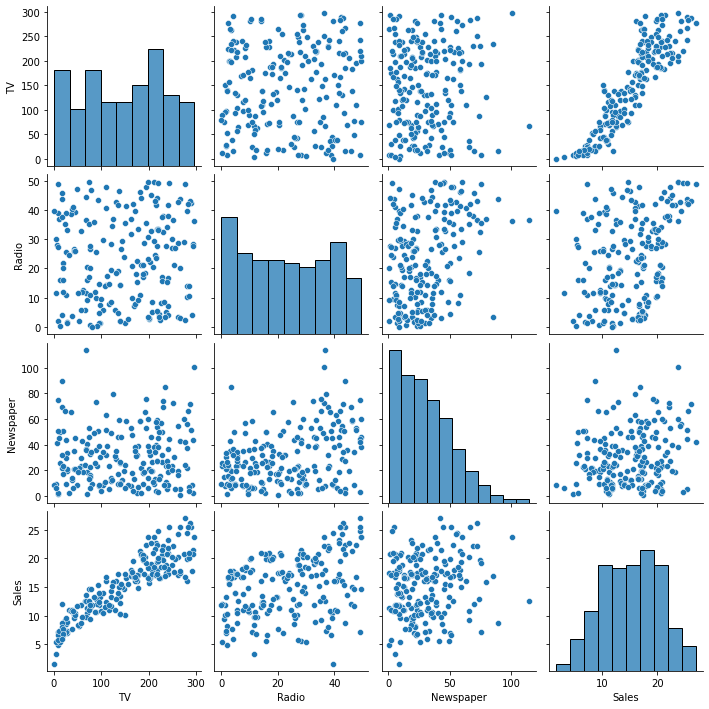

In [47]:
sns.pairplot(data)

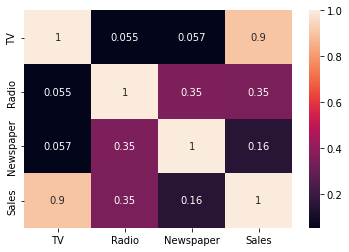

In [48]:
correlation = data.corr()
sns.heatmap(correlation, annot=True)

In [49]:
print(correlation['Sales'].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


In [50]:
import plotly.express as px
import plotly.graph_objects as go
figure = px.scatter(data_frame = data, x="Sales",
                    y="TV", size="TV", trendline="ols")
figure.show()

In [51]:
figure = px.scatter(data_frame = data, x="Sales",
                    y="Newspaper", size="Newspaper", trendline="ols")
figure.show()

In [52]:
figure = px.scatter(data_frame = data, x="Sales",
                    y="Radio", size="Radio", trendline="ols")
figure.show()

In [53]:
x = data.drop(['Sales'], axis=1)
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [54]:
x1 = data [['TV', 'Radio', 'Newspaper']]
x1.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [55]:
y = data['Sales']
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
model = LinearRegression()

In [58]:
model.fit(xtrain, ytrain)

LinearRegression()

In [59]:
model.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [60]:
model.intercept_

4.714126402214127

In [61]:
model.score(xtest, ytest)

0.9059011844150826

In [62]:
features = np.array([[230.1, 37.8, 69.2]])
model.predict(features)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([21.37254028])